<a href="https://colab.research.google.com/github/juliobjj/aad/blob/main/wine_quality_classfier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição

Neste projeto, vamos treinar algoritmos de Machine Learning para prever a qualidade de vinhos tintos com base em dados físico-químicos, como acidez, álcool e pH.
Nosso objetivo é identificar o modelo que oferece a melhor performance de previsão, respeitando boas práticas de desenvolvimento de software.

# Importação das bibliotecas

Nesta célula, importamos bibliotecas essenciais para manipular dados, treinar modelos e avaliá-los.

In [1]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Carregamento dos dados

Aqui carregamos o dataset de vinhos e separamos os dados em variáveis de entrada (características do vinho) e saída (qualidade). Depois, dividimos os dados em conjuntos de treino e teste.

In [11]:
# Carregamento do dataset
df = pd.read_csv('/content/winequality-red-simulado.csv', sep=';')
df['quality'].value_counts(normalize=True)

# Separação entre variáveis explicativas e alvo
X = df.drop('quality', axis=1)
y = df['quality']

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Formato dos dados de treino:", X_train.shape)


quality
5    0.526875
6    0.244375
4    0.176875
7    0.036250
3    0.015625
Name: proportion, dtype: float64
Formato dos dados de treino: (1280, 11)


# Pré-processamento

Para que os modelos funcionem bem, os dados precisam estar padronizados. Esta classe aplica um processo de normalização que melhora o desempenho de diversos algoritmos.

In [12]:
class Preprocessor:
    def __init__(self):
        self.scaler = StandardScaler()

    def get_pipeline(self, model):
        return Pipeline([
            ('scaler', self.scaler),
            ('classifier', model)
        ])

# Avaliação dos dados

Esta classe mede o desempenho dos modelos utilizando o relatório de classificação do Scikit-Learn, que inclui precisão, recall e F1-score

In [13]:
class Evaluator:
    def __init__(self, X_test, y_test):
        self.X_test = X_test
        self.y_test = y_test

    def evaluate(self, pipeline, X_train, y_train):
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(self.X_test)
        report = classification_report(self.y_test, y_pred, output_dict=True)
        return report

# Exportação do Modelo

Após encontrar o melhor modelo, salvamos ele em disco para uso posterior, sem precisar treinar novamente.

In [14]:
class ModelExporter:
    def __init__(self, output_path):
        self.output_path = output_path

    def export(self, model):
        joblib.dump(model, self.output_path)


# Treinamento dos modelos

Nesta etapa, comparamos vários algoritmos clássicos de classificação:

*   KNN (K-Nearest Neighbors)
*   Árvore de Decisão
*   Naive Bayes
*  SVM (Support Vector Machine)

Cada modelo é treinado, avaliado e comparado usando a métrica F1-score.

Treinando modelo: KNN...
KNN - F1 Score: 0.6744

Treinando modelo: Árvore de Decisão...
Árvore de Decisão - F1 Score: 0.9937

Treinando modelo: Naive Bayes...
Naive Bayes - F1 Score: 0.7428

Treinando modelo: SVM...
SVM - F1 Score: 0.7637



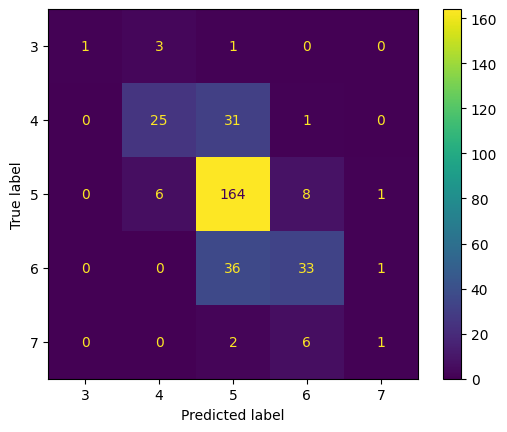

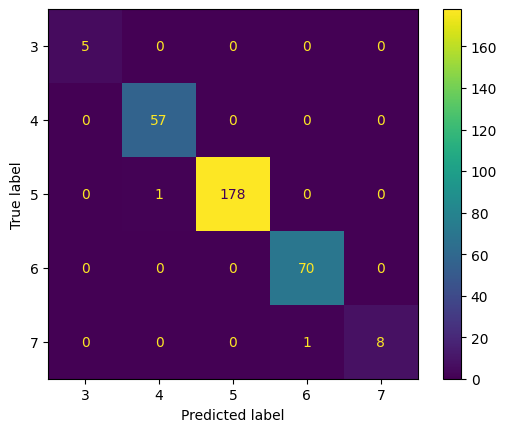

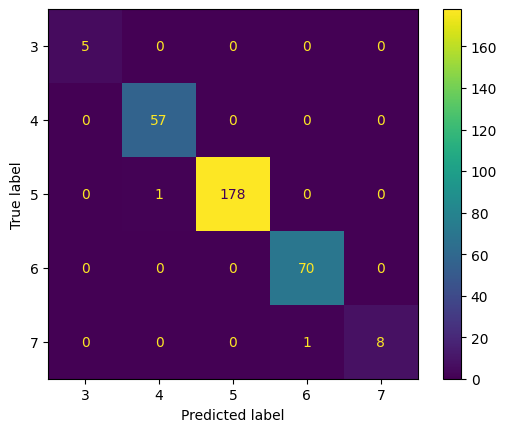

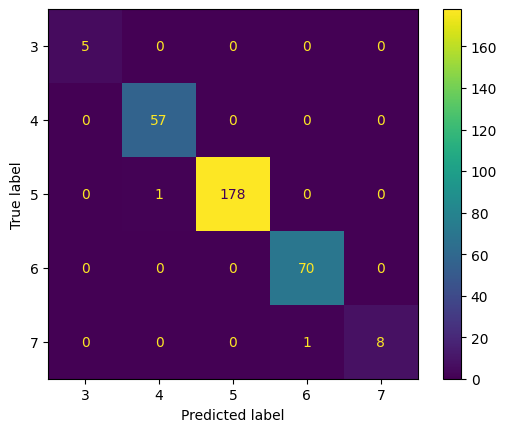

In [15]:
models = {
    'KNN': KNeighborsClassifier(),
    'Árvore de Decisão': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(class_weight='balanced', random_state=42)
}

best_f1 = 0
best_model_name = ''
best_pipeline = None

evaluator = Evaluator(X_test, y_test)

for name, model in models.items():
    print(f"Treinando modelo: {name}...")
    preprocessor = Preprocessor()
    pipeline = preprocessor.get_pipeline(model)
    report = evaluator.evaluate(pipeline, X_train, y_train)
    f1 = report['weighted avg']['f1-score']
    print(f"{name} - F1 Score: {f1:.4f}\n")

    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
        best_pipeline = pipeline

# Exibe o melhor modelo

Mostramos qual modelo teve o melhor desempenho no teste.

In [16]:
print(f"🏆 Melhor modelo: {best_model_name} com F1 Score: {best_f1:.4f}")


🏆 Melhor modelo: Árvore de Decisão com F1 Score: 0.9937


# Exportação do modelo final

Salvamos o melhor modelo em um arquivo .joblib, que pode ser reutilizado posteriormente para fazer previsões em novos dados.

In [17]:
exporter = ModelExporter("best_model.joblib")
exporter.export(best_pipeline)
print("✅ Modelo exportado com sucesso.")

✅ Modelo exportado com sucesso.
